<img src="img/onepiece.jpg">

In [91]:
import pandas as pd 
import numpy as np 

In [140]:
# loading the anime dataset
anime_data = pd.read_csv("Datasets/Episodes_Rating_dataset.csv")
anime_data.shape

(1000, 8)

In [141]:
#prview some of the data
anime_data.head(10)

,season,episode,name,date,total_votes,average_rating,rank,trend
0,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,"1,316",7.8,"15,683",25
1,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,853,7.9,"22,891",14
2,1,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,718,7.8,"26,808",13
3,1,4,Luffy's Past! The Red-haired Shanks Appears!,1999,829,8.4,"21,230",40
4,1,5,"Fear, Mysterious Power! Pirate Clown Captain B...",1999,626,7.6,"30,990",11
5,1,6,Desperate Situation! Beast Tamer Mohji vs. Luffy!,1999,608,7.8,"30,448",9
6,1,7,Sozetsu Ketto! Kengo Zoro VS Kyokugei no Kabaji!,1999,584,7.7,"32,035",9
7,1,8,Shousha wa docchi? Akuma no mi no nouryoku tai...,1999,561,7.8,"32,370",8
8,1,9,Seigi no usotsuki? Kyaputen Usoppu,2000,540,7.4,"36,139",7
9,1,10,Chijou saikyou no hen na yatsu! Saiminjutsushi...,2000,524,7.6,"35,494",8


In [142]:
# information about the columns 
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          1000 non-null   int64  
 1   episode         1000 non-null   int64  
 2   name            1000 non-null   object 
 3   date            1000 non-null   int64  
 4   total_votes     1000 non-null   object 
 5   average_rating  1000 non-null   float64
 6   rank            1000 non-null   object 
 7   trend           1000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.6+ KB


In [143]:
# cleaning the data 
anime_data['rank'] = anime_data['rank'].str.replace(',', '')
anime_data['trend'] = anime_data['trend'].str.replace(',', '')
anime_data['trend'] = anime_data['trend'].str.replace('-', '0')
anime_data['total_votes'] = anime_data['total_votes'].str.replace(',', '')
# changing the columns values 
anime_data['rank'] = anime_data['rank'].astype('int')
anime_data['trend'] = anime_data['trend'].astype('int')
anime_data['total_votes'] = anime_data['total_votes'].astype('int')

In [144]:
# information about the columns 
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          1000 non-null   int64  
 1   episode         1000 non-null   int64  
 2   name            1000 non-null   object 
 3   date            1000 non-null   int64  
 4   total_votes     1000 non-null   int32  
 5   average_rating  1000 non-null   float64
 6   rank            1000 non-null   int32  
 7   trend           1000 non-null   int32  
dtypes: float64(1), int32(3), int64(3), object(1)
memory usage: 50.9+ KB


In [145]:
# the cleaned data
anime_data.head(10)

,season,episode,name,date,total_votes,average_rating,rank,trend
0,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,1316,7.8,15683,25
1,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,853,7.9,22891,14
2,1,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,718,7.8,26808,13
3,1,4,Luffy's Past! The Red-haired Shanks Appears!,1999,829,8.4,21230,40
4,1,5,"Fear, Mysterious Power! Pirate Clown Captain B...",1999,626,7.6,30990,11
5,1,6,Desperate Situation! Beast Tamer Mohji vs. Luffy!,1999,608,7.8,30448,9
6,1,7,Sozetsu Ketto! Kengo Zoro VS Kyokugei no Kabaji!,1999,584,7.7,32035,9
7,1,8,Shousha wa docchi? Akuma no mi no nouryoku tai...,1999,561,7.8,32370,8
8,1,9,Seigi no usotsuki? Kyaputen Usoppu,2000,540,7.4,36139,7
9,1,10,Chijou saikyou no hen na yatsu! Saiminjutsushi...,2000,524,7.6,35494,8


In [146]:
# the count , mean std, min, max, and 
anime_data[['total_votes','average_rating','rank','trend']].describe()

,total_votes,average_rating,rank,trend
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,398.918000,8.201400,49898.509000,18.013000
std,424.165064,0.729843,19930.289878,17.733113
min,166.000000,5.700000,1012.000000,0.000000
25%,221.000000,7.700000,35030.000000,5.000000
50%,284.000000,8.200000,50393.500000,9.000000
75%,409.000000,8.800000,65223.500000,35.000000
max,5357.000000,9.700000,99792.000000,241.000000


In [147]:
#Normalize the rank and the trend 
orginal_anime_data = anime_data.copy()
anime_data['rank'] = (orginal_anime_data['rank'] - orginal_anime_data['rank'].min()) / (orginal_anime_data['rank'].max() - orginal_anime_data['rank'].min()) * 10
anime_data['trend'] = (orginal_anime_data['trend'] - orginal_anime_data['trend'].min()) / (orginal_anime_data['trend'].max() - orginal_anime_data['trend'].min()) * 10 
anime_data[['total_votes','average_rating','rank','trend']].describe()

,total_votes,average_rating,rank,trend
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,398.918000,8.201400,4.949029,0.747427
std,424.165064,0.729843,2.017644,0.735814
min,166.000000,5.700000,0.000000,0.000000
25%,221.000000,7.700000,3.443815,0.207469
50%,284.000000,8.200000,4.999140,0.373444
75%,409.000000,8.800000,6.500456,1.452282
max,5357.000000,9.700000,10.000000,10.000000


In [148]:
import matplotlib.pyplot as plt

In [149]:
# regrouping the data by year 
anime_data_by_year = anime_data[['date','total_votes','average_rating','rank','trend']].groupby(['date']).mean()
anime_data_by_year

,total_votes,average_rating,rank,trend
date,,,,
1999,761.875000,7.850000,2.586037,0.669087
2000,481.750000,7.870455,3.688477,0.425311
2001,371.809524,7.719048,4.621000,0.327010
2002,349.750000,7.895455,4.897782,0.495096
2003,270.027027,7.772973,5.794868,0.294942
2004,276.666667,7.935897,5.656450,0.493670
2005,294.307692,7.953846,5.612303,0.597936
2006,295.500000,8.073684,5.540052,0.601660
2007,315.666667,7.853333,5.870118,0.641770


Text(0.5, 0, 'Year')

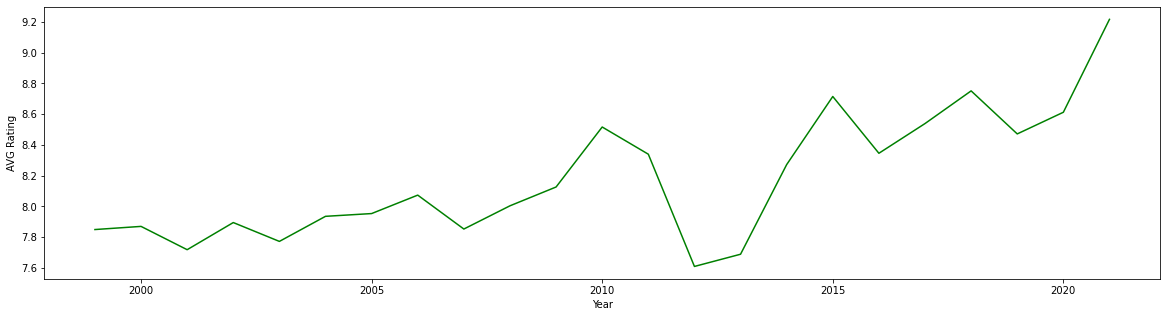

In [150]:
# the progress of the avr rating by year 
plt.figure(figsize = (20,5))
plt.plot(anime_data_by_year.index,anime_data_by_year['average_rating'],color='green')
plt.ylabel('AVG Rating')
plt.xlabel ('Year')
# fun fact 1 : we all know the the show is getting better each year 

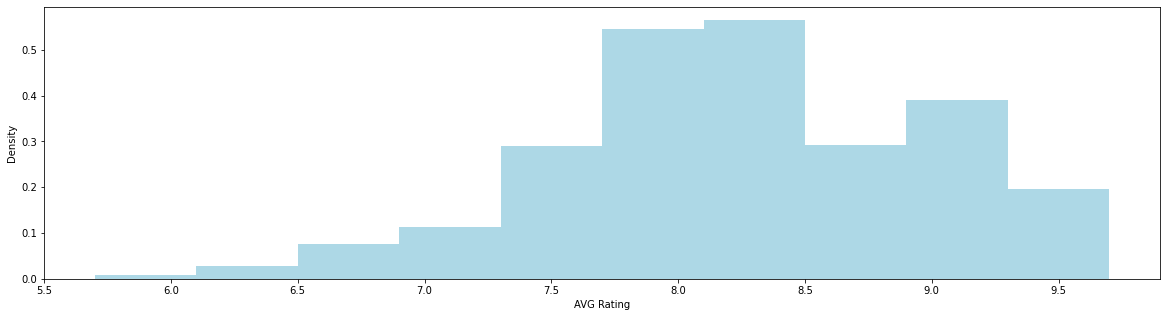

In [154]:
# Density of avrage rating 
plt.figure(figsize = (20, 5))


plt.hist(anime_data['average_rating'], density=True, color='lightblue' )
plt.ylabel('Density')
plt.xlabel ('AVG Rating')
plt.show()

Text(0.5, 0, 'Year')

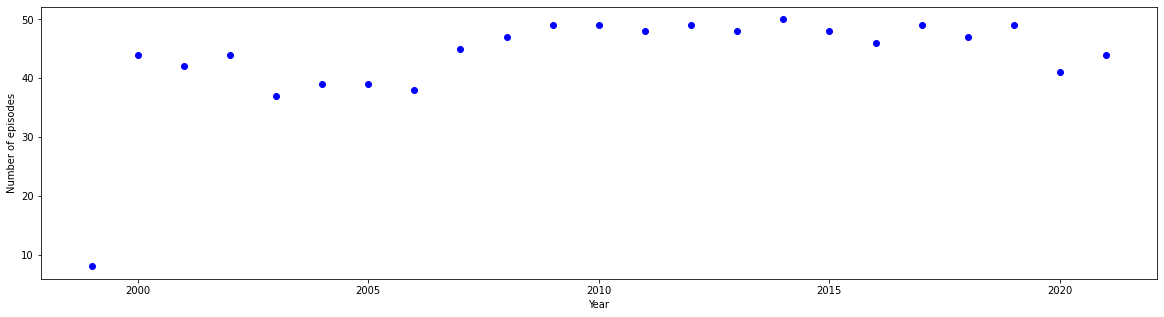

In [155]:
# the number of episodes by year 
plt.figure(figsize = (20,5))
plt.scatter(anime_data[['date','episode']].groupby(['date']).count().index,y=anime_data[['date','episode']].groupby(['date']).count(),color='blue')
plt.ylabel('Number of episodes')
plt.xlabel ('Year')
#fun fact 2 : it's never enough episodes of one piece

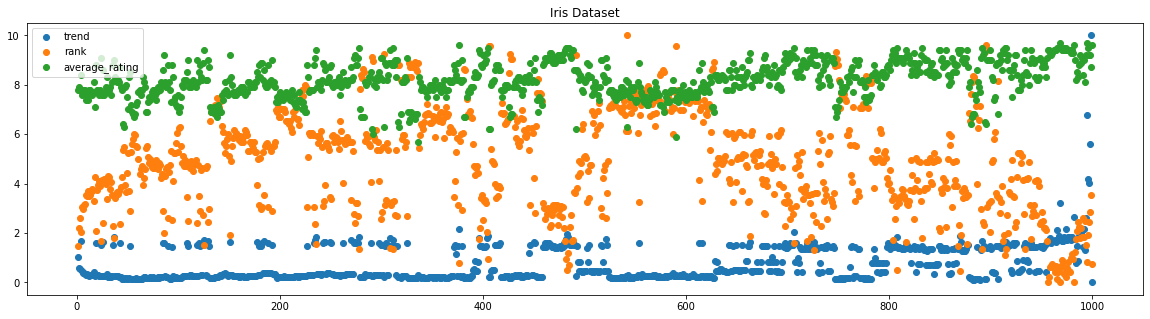

In [156]:

columns = anime_data[['trend','rank','average_rating']] #we remove the class attribute
x_data = anime_data['episode'] 

fig, ax = plt.subplots(figsize = (20,5))
for column in columns:
    ax.scatter(x_data, anime_data[column], label=column)

ax.set_title('Iris Dataset')
ax.legend()

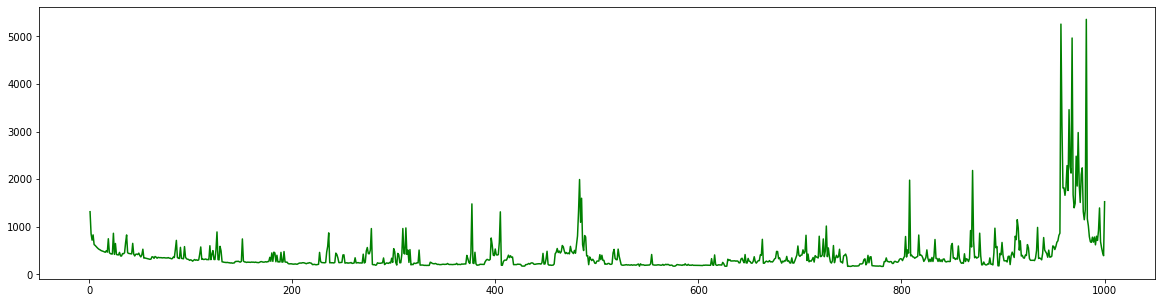

In [157]:
plt.figure(figsize = (20,5))
plt.plot(anime_data['episode'],anime_data['total_votes'],color="green")

<img src="top100.jpg">
<h1> Characters Popularity  </h1>

In [166]:
# loading the anime charachter popularity dataset
Popularity_data = pd.read_csv("Datasets/All_Popularity.csv")
#~sorting the data by the rank 
Popularity_data = Popularity_data.sort_values(by=['Rank'])
Popularity_data.shape

(2562, 5)

In [159]:
Popularity_data.head(14)


,Character,Rank,Votes,Pool year,Total nomber of votes
0,Monkey D. Luffy,1.0,8055.0,1999,36000
1,Monkey D. Luffy,1.0,11136.0,2002,51873
2,Monkey D. Luffy,1.0,12844.0,2006,50804
3,Monkey D. Luffy,1.0,7065.0,2009,42116
4,Monkey D. Luffy,1.0,9183.0,2015,69472
5,Monkey D. Luffy,1.0,11737.0,2017,80000
6,Monkey D. Luffy,1.0,1637921.0,2021,12000000
7,Roronoa Zoro,2.0,7260.0,1999,36000
8,Roronoa Zoro,2.0,10982.0,2002,51873
9,Roronoa Zoro,2.0,8225.0,2006,50804


In [167]:
Popularity_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2562 entries, 0 to 2560
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Character              2562 non-null   object 
 1   Rank                   887 non-null    float64
 2   Votes                  335 non-null    float64
 3   Pool year              2562 non-null   int64  
 4   Total nomber of votes  2562 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 120.1+ KB


In [173]:
# filling the missing values 
Popularity_data['Rank'] = Popularity_data['Rank'].fillna(0)
Popularity_data['Votes']= Popularity_data['Votes'].fillna(0)
Popularity_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2562 entries, 0 to 2560
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Character              2562 non-null   object 
 1   Rank                   2562 non-null   float64
 2   Votes                  2562 non-null   float64
 3   Pool year              2562 non-null   int64  
 4   Total nomber of votes  2562 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 120.1+ KB


In [174]:
Popularity_data.groupby(['Character', 'Pool year']).first()


Rank  Votes  Total nomber of votes
Character Pool year                                     
Absalom   1999         0.0    0.0                  36000
          2002         0.0    0.0                  51873
          2006         0.0    0.0                  50804
          2009       100.0    0.0                  42116
          2015         0.0    0.0                  69472
...                    ...    ...                    ...
担当の大西さん   2006         0.0    0.0                  50804
          2009       122.0    0.0                  42116
          2015         0.0    0.0                  69472
          2017         0.0    0.0                  80000
          2021         0.0    0.0               12000000

[2562 rows x 3 columns]